In [46]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [47]:
train_output = pd.read_csv("train_output_DzPxaPY.csv")
train_output.head()

,ID,FREQ,CM,ANNEE_ASSURANCE,CHARGE
0,1,0.0,0.0,1.000000,0.0
1,2,0.0,0.0,1.000000,0.0
2,3,0.0,0.0,0.402740,0.0
3,4,0.0,0.0,0.246575,0.0
4,5,0.0,0.0,0.838356,0.0


### Nettoyage de y

In [49]:
train_output = abs(train_output)
train_output.describe()
# grznde range de valeur pour Frq et CM

,ID,FREQ,CM,ANNEE_ASSURANCE,CHARGE
count,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000
mean,191805.500000,0.012452,182.593925,0.701557,186.159351
std,110738.812719,0.357127,6699.965459,0.352375,6800.488350
min,1.000000,0.000000,0.000000,0.002732,0.000000
25%,95903.250000,0.000000,0.000000,0.389041,0.000000
50%,191805.500000,0.000000,0.000000,0.882192,0.000000
75%,287707.750000,0.000000,0.000000,1.000000,0.000000
max,383610.000000,182.499998,500000.000000,2.000000,552000.000000


In [51]:
# quand CM = 0 mais FREQ > 0 on met FREQ = 0
train_output.loc[(train_output["CM"] == 0) & (train_output["FREQ"] > 0),"FREQ"] = 0 

In [61]:
# limite le CM min à 228 (seuil d'intervention minimal trouver sur le site de CA) le max avec iqr ou MAD
train_output["CM"] = np.where((train_output["CM"]<228) & (train_output["CM"]>0),228, train_output["CM"]) # reajuster la valeur de charge


Calcul du nombre de sinistre pour avoir des comptes au lieu de fréquences.  
Comparaison des performances avec l'utilisation de sinistre ou fréquence

In [63]:
# FREQ = nb_sinitre / ANNE ASSURANCE
# Quand l'annee d'assurance est inf à 1 ==> tres grande valeur même si un seul sinistre
train_output["NbSinistre"] = train_output["ANNEE_ASSURANCE"] * train_output["FREQ"]
train_output.describe()

,ID,FREQ,CM,ANNEE_ASSURANCE,CHARGE,NbSinistre
count,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000
mean,191805.500000,0.010326,182.651999,0.701557,186.159351,0.006395
std,110738.812719,0.345798,6699.965284,0.352375,6800.488350,0.083104
min,1.000000,0.000000,0.000000,0.002732,0.000000,0.000000
25%,95903.250000,0.000000,0.000000,0.389041,0.000000,0.000000
50%,191805.500000,0.000000,0.000000,0.882192,0.000000,0.000000
75%,287707.750000,0.000000,0.000000,1.000000,0.000000,0.000000
max,383610.000000,182.499998,500000.000000,2.000000,552000.000000,5.000000


In [66]:
train_output["NbSinistre"] = train_output["NbSinistre"].round(2).astype('int')
train_output["NbSinistre"].value_counts(dropna=False)
# utiliser pour les modelisation
# 381252  381538

NbSinistre
0    381252
1      2270
2        84
3         2
5         1
4         1
Name: count, dtype: int64

In [67]:
# regroupe 2-3-5
train_output["NbSinistre"] = np.where(train_output["NbSinistre"]>2, 2,train_output["NbSinistre"])
train_output["NbSinistre"].value_counts(dropna=False)


NbSinistre
0    381252
1      2270
2        88
Name: count, dtype: int64

In [69]:
# outlier sup des cibles pour differentes méthodes

for col in train_output[["CM","FREQ","NbSinistre"]] :
    print(col)
    print("outlier sup MAD 3.5 (sans 0)", np.median(train_output[col][train_output[col]>0]) + 3.5*median_abs_deviation(train_output[col][train_output[col]>0]))
    print("outlier sup MAD 3 (sans 0)", np.median(train_output[col][train_output[col]>0]) + 3*median_abs_deviation(train_output[col][train_output[col]>0]))
    print("outlier sup MAD 3.29 (sans 0)", np.median(train_output[col][train_output[col]>0]) + 3.29*median_abs_deviation(train_output[col][train_output[col]>0]))
    
    print("outlier sup IQR 1.5 (sans 0)", np.quantile(train_output[col][train_output[col]>0],0.75) + 1.5*iqr(train_output[col][train_output[col]>0]))
    print("outlier sup IQR 3 (sans 0)", np.quantile(train_output[col][train_output[col]>0],0.75) + 3*iqr(train_output[col][train_output[col]>0]))

    print("outlier sup std 2 (sans 0)", np.mean(train_output[col][train_output[col] >0]) + 2* np.std(train_output[col][train_output[col] >0]))
    print("outlier sup std 2.5 (sans 0)", np.mean(train_output[col][train_output[col] >0]) + 2.5* np.std(train_output[col][train_output[col] >0]))
    print("outlier sup std 3 (sans 0)", np.mean(train_output[col][train_output[col] >0]) + 3* np.std(train_output[col][train_output[col] >0]),"\n")

CM
outlier sup MAD 3.5 (sans 0) 7146.324999999999
outlier sup MAD 3 (sans 0) 6380.65
outlier sup MAD 3.29 (sans 0) 6824.7415
outlier sup IQR 1.5 (sans 0) 24244.63875
outlier sup IQR 3 (sans 0) 38500.4925
outlier sup std 2 (sans 0) 190030.31901848747
outlier sup std 2.5 (sans 0) 230109.23746168724
outlier sup std 3 (sans 0) 270188.15590488695 

FREQ
outlier sup MAD 3.5 (sans 0) 1.1461864405642903
outlier sup MAD 3 (sans 0) 1.1299435027238136
outlier sup MAD 3.29 (sans 0) 1.13936440667129
outlier sup IQR 1.5 (sans 0) 2.450216450396006
outlier sup IQR 3 (sans 0) 3.3203463206336092
outlier sup std 2 (sans 0) 9.840390041539521
outlier sup std 2.5 (sans 0) 11.880529837965058
outlier sup std 3 (sans 0) 13.920669634390597 

NbSinistre
outlier sup MAD 3.5 (sans 0) 1.0
outlier sup MAD 3 (sans 0) 1.0
outlier sup MAD 3.29 (sans 0) 1.0
outlier sup IQR 1.5 (sans 0) 1.0
outlier sup IQR 3 (sans 0) 1.0
outlier sup std 2 (sans 0) 1.4164081312942116
outlier sup std 2.5 (sans 0) 1.511180223490114
outlier 

### Preprocessing

In [75]:
train = pd.read_pickle("train_clean_V1.pkl")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler,OrdinalEncoder

from feature_engine.outliers import Winsorizer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 



In [77]:
# maj de charge. round 2 pour etre correct
train = train.drop(["ANNEE_ASSURANCE","ID"], axis = 1)
train_output["CHARGE"] = (train_output["FREQ"] * train_output["CM"] * train_output["ANNEE_ASSURANCE"]).round(2)

X_train,X_test,y_train,y_test = train_test_split(train,train_output, test_size=0.25,stratify=train_output["NbSinistre"], random_state=123)

y_train_freq = y_train[["FREQ"]]
y_test_freq = y_test[["FREQ"]]

y_train_cm = y_train[["CM"]]
y_test_cm = y_test[["CM"]]

y_train_sinistre = y_train["NbSinistre"]
y_test_sinistre = y_test["NbSinistre"]

#### outliers de y 

Frequence : cap les outliers avec IQR   (2.38)   
CM : cap les outliers avec MAD et IQR (7146 et 24244) 

In [ ]:
target_out_mad_CM = Winsorizer(capping_method="mad", tail = "right",fold=3.5)

target_out_iqr_FREQ = Winsorizer(capping_method="iqr", tail = "right")

In [ ]:
#set les outliers avec methodes std et iqr pour freq et cm

# MAD CM
target_out_mad_CM.fit(y_train_cm[y_train_cm["CM"] > 0])
y_train_cm_out_mad = target_out_mad_CM.transform(y_train_cm)
y_test_cm_out_mad = target_out_mad_CM.transform(y_test_cm)


# IQR FREQ 
target_out_iqr_FREQ.fit(y_train_freq[y_train_freq["FREQ"] > 0])
y_train_freq_out_iqr = target_out_iqr_FREQ.transform(y_train_freq)
y_test_freq_out_iqr = target_out_iqr_FREQ.transform(y_test_freq)


In [ ]:

charge_train_mad = (y_train_cm_out_mad["CM"] * y_train_freq_out_iqr["FREQ"] * y_train["ANNEE_ASSURANCE"]).round(2)
charge_test_mad = (y_test_cm_out_mad["CM"] * y_test_freq_out_iqr["FREQ"] * y_test["ANNEE_ASSURANCE"]).round(2)
y_train["CHARGE_MAD"] = charge_train_mad
y_test["CHARGE_MAD"] = charge_test_mad


In [ ]:
print(target_out_mad_CM.right_tail_caps_)
print(target_out_iqr_FREQ.right_tail_caps_)


{'CM': 10301.327351962223}
{'CM': 25018.274999999998}
{'FREQ': 2.3298473154413433}


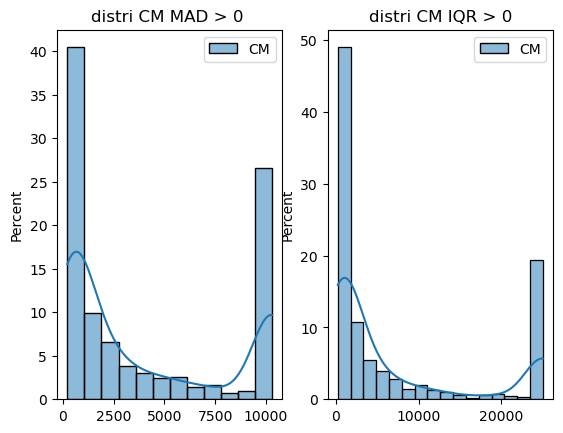

In [ ]:
# distribution de CM sans 0
sns.histplot(y_train_cm_out_mad[y_train_cm_out_mad>0],kde=True,stat='percent')
plt.title("distri CM MAD > 0 ")


c:\Users\loreb\anaconda3\envs\envCA\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\loreb\anaconda3\envs\envCA\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


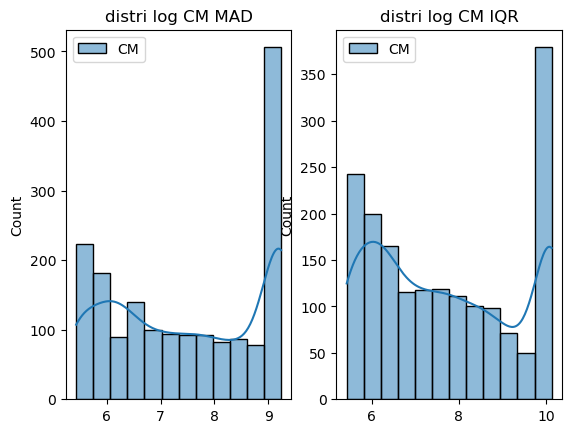

In [ ]:
# distribution de freq outlier std au log
sns.histplot(np.log(y_train_cm_out_mad),kde=True)
plt.title("distri log CM MAD")


In [ ]:
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV


In [89]:
import re
def sorted_moda(df,col_name): 
    """ 
        Sorts the given iterable in the way that is expected.
        fonction lambda convert : si la chaine de caractere est numeric renvoie une int
        fcontcion alphanum_key : scinde une string en fonction des nombres dedans. 
        puis chaque element splité est passé dans convert
        si il y a des nan, c'est à rajouter à part en fin de liste
        
        Required arguments:
        df -- dataframe.
        col_name : nom de la colonne
        
        return : la liste des modalité classé en fonction de la clé numérique
        """
    modalites = df[col_name].value_counts().index # recup les modalités
    
    if re.search(r'([A-Za-z]+)(\d+)', str(modalites[0])) : # si la premiere modalité est composée d'une première part en lettre et seconde en chiffres on fait le sort
        
        convert = lambda text: int(text) if text.isdigit() else text
        alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
        sortedmoda =sorted(modalites, key = alphanum_key)
         
    
    else :
        sortedmoda = sorted(modalites)
    
    if np.nan in train[col_name].value_counts(dropna=False).index : # si il y a des Na met en fin de l'odre
        sortedmoda.append(np.nan) 
    
    return sortedmoda
    
    

In [90]:
categorical_features = train.select_dtypes("object").columns
numerical_features = train.select_dtypes("number").columns

# liste des modalités rangé pour les col object
moda_sorted = [sorted_moda(train,col) for col in categorical_features]

In [ ]:
# corrige la forme des Y

y_train_cm = y_train_cm.values.ravel()
y_test_cm = y_test_cm.values.ravel()


y_train_cm_out_mad = y_train_cm_out_mad.values.ravel()
y_test_cm_out_mad = y_test_cm_out_mad.values.ravel()


y_train_freq_out_iqr = y_train_freq_out_iqr.values.ravel()
y_test_freq_out_iqr = y_test_freq_out_iqr.values.ravel()

y_train_sinistre = y_train_sinistre.values.ravel()
y_test_sinistre = y_test_sinistre.values.ravel()

In [ ]:
# modifier pour gérer les prédit log
def model_eval_pipe(X_train,X_test
                    ,y_train,y_test
                    ,CM_train,CM_test
                    ,FREQ_train,FREQ_test
                    ,model_CM,model_FREQ
                    ,sinistre =False,log=False) : 
    
    # pour CM fit que sur les valeurs positives
    idx_cm_train = CM_train > 0
    idx_cm_test = CM_test > 0
    
    # fit pour CM
    #pipeline_CM.fit(X_train[idx_cm_train],CM_train[idx_cm_train])
    pred_cm_train  = model_CM.predict(X_train[idx_cm_train]) #pred sur CM>0
    pred_cm_test = model_CM.predict(X_test[idx_cm_test])
    
    # pred sur tout CM
    pred_cm_train_full  = model_CM.predict(X_train) # pred sur tout CM
    pred_cm_test_full = model_CM.predict(X_test)
    
    if log : 
        pred_cm_train = np.exp(pred_cm_train)
        pred_cm_test = np.exp(pred_cm_test)
        pred_cm_train_full = np.exp(pred_cm_train_full)
        pred_cm_test_full = np.exp(pred_cm_test_full)
    
    # RMSE sur CM positif
    RMSE_train_CM = root_mean_squared_error(CM_train[idx_cm_train],pred_cm_train) # eval du model sur val pos
    RMSE_test_CM = root_mean_squared_error(CM_test[idx_cm_test],pred_cm_test)
    
    
    # fit pour FREQ
    #pipeline_FREQ.fit(X_train,FREQ_train)
    pred_freq_train  = model_FREQ.predict(X_train)
    pred_freq_test = model_FREQ.predict(X_test)
    RMSE_train_FREQ = root_mean_squared_error(FREQ_train,pred_freq_train)
    RMSE_test_FREQ = root_mean_squared_error(FREQ_test,pred_freq_test)
    
    # pred de charge
    charge_ajustee_train = (CM_train * FREQ_train * y_train["ANNEE_ASSURANCE"]).round(2) # ajuste la charge
    charge_ajustee_test = (CM_test * FREQ_test * y_test["ANNEE_ASSURANCE"]).round(2)
        

    if sinistre :
        charge_pred_train = (pred_cm_train_full * pred_freq_train).round(2)
        charge_pred_test = (pred_cm_test_full * pred_freq_test).round(2)
    else :
        charge_pred_train = (pred_cm_train_full * pred_freq_train * y_train["ANNEE_ASSURANCE"]).round(2)
        charge_pred_test = (pred_cm_test_full * pred_freq_test * y_test["ANNEE_ASSURANCE"]).round(2)
    
    RMSE_charge_train = root_mean_squared_error(charge_ajustee_train,charge_pred_train)
    RMSE_charge_test = root_mean_squared_error(charge_ajustee_test,charge_pred_test)
    
    RMSE_charge_train_pos = root_mean_squared_error(charge_ajustee_train[charge_ajustee_train>0],charge_pred_train[charge_ajustee_train>0])
    RMSE_charge_test_pos = root_mean_squared_error(charge_ajustee_test[charge_ajustee_test>0],charge_pred_test[charge_ajustee_test>0])

    
    rst = {
            "rmse_train_CM" : RMSE_train_CM,
            "rmse_test_CM" : RMSE_test_CM,
            "diff_CM" : RMSE_train_CM - RMSE_test_CM,
            "rmse_train_FREQ" : RMSE_train_FREQ,
            "rmse_test_FREQ" : RMSE_test_FREQ,
            "diff_FREQ" : RMSE_train_FREQ - RMSE_test_FREQ,
            "rmse_train_CHARGE" : RMSE_charge_train,
            "rmse_test_CHARGE" : RMSE_charge_test,
            "diff_CHARGE" : RMSE_charge_train - RMSE_charge_test,
            "rmse_charge_pos_train" : RMSE_charge_train_pos,
            "rmse_charge_pos_test" : RMSE_charge_test_pos,
            "diff_charge_pos" : RMSE_charge_train_pos - RMSE_charge_test_pos
            }
    
    
    return rst


### Pipe 2 :Laisse lgbm gérer tout les na, variance treshold, drop corr feat

In [280]:

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories = moda_sorted ,dtype='float',min_frequency = 0.01
                    ,handle_unknown ="use_encoded_value" ,unknown_value = np.nan)) # smin_frequency = 0.01 pour rassembler les rares. prennent la plus grande valeur
])

# Combine pipelines into a ColumnTransformer
preprocessor_NA = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
        ]
    )

X_train_sc = preprocessor_NA.fit_transform(X_train)
X_test_sc = preprocessor_NA.transform(X_test)



In [309]:
col_pipeNA = list(X_train[numerical_features].columns) + list(X_train[categorical_features])

X_train_sc = pd.DataFrame(X_train_sc,columns=col_pipeNA)
X_test_sc = pd.DataFrame(X_test_sc,columns=col_pipeNA)

In [314]:
# retire les variables sans variances
vr = VarianceThreshold()
vr.fit(X_train_sc)

X_train_sc = pd.DataFrame(vr.transform(X_train_sc),columns=vr.get_feature_names_out())
X_test_sc = pd.DataFrame(vr.transform(X_test_sc),columns=vr.get_feature_names_out())


VarianceThreshold()

In [ ]:
# test des meilleurs objectives pour model CM et freq ave csinistre

grid_CM = [{"objective" : ['tweedie'],
           "tweedie_variance_power" : [1.5,1.7,1.99]},
           {"objective" : ["gamma","root_mean_squared_error"]}]

grid_FR = [{"objective" : ["tweedie"],
           "tweedie_variance_power" : [1,1.25,1.5,1.75]
           }, 
           {"objective" : ["poisson","root_mean_squared_error"]}]

grilles = [grid_CM,grid_CM,grid_FR]

models_name = ["model_CM_MAD","model_sinistre"]
models = [LGBMRegressor()]*2
dico_grille = {}

for md, para, md_name in zip(models,grilles,models_name) :
    dico_grille[md_name] = GridSearchCV(md, param_grid=para, cv = 8
                                        , scoring="neg_root_mean_squared_error")
    


rst_models_NA = {}

for model,grille in dico_grille.items() :
    # train les model avec les cible adéquates
    
    if model == "model_CM_MAD" : 
        rst_models_NA[model] = grille.fit(X_train_sc[y_train_cm_out_mad>0],y_train_cm_out_mad[y_train_cm_out_mad>0])
        
        
    if model == "model_sinistre" :
        rst_models_NA[model] = grille.fit(X_train_sc,y_train_sinistre)    

In [321]:
for model in rst_models_NA.keys() : 
    print(model)
    print(rst_models_NA[model].best_params_)
    print(rst_models_NA[model].best_score_,"\n")


model_CM_MAD
{'objective': 'root_mean_squared_error'}
-4293.164016390017 

model_sinistre
{'objective': 'tweedie', 'tweedie_variance_power': 1.5}
-0.08224415949379293 



In [540]:
rst_NA = pd.DataFrame()

In [541]:

# arg CM MAD, sinistre
argument_NA = [X_train_sc,X_test_sc,y_train,y_test,
                      y_train_cm_out_mad,y_test_cm_out_mad,
                      y_train_sinistre,y_test_sinistre]



In [542]:
####### avec frequence

#modele avec CM MAD et Frequence
bench_NA = pd.DataFrame(model_eval_pipe(*argument_NA
                                   ,rst_models_NA["model_CM_MAD"].best_estimator_,rst_models_NA["model_sinistre"].best_estimator_,
                                   sinistre=True)
                                ,index =["bmk_NA"])



In [543]:
rst_NA = pd.concat([rst_NA,bench_NA])

rst_NA

,rmse_train_CM,rmse_test_CM,diff_CM,rmse_train_FREQ,rmse_test_FREQ,diff_FREQ,rmse_train_CHARGE,rmse_test_CHARGE,diff_CHARGE,rmse_charge_pos_train,rmse_charge_pos_test,diff_charge_pos
bmk_NA,1468.27411,4199.679035,-2731.404925,0.081212,0.082296,-0.001084,406.674393,369.498885,37.175508,5175.735052,4697.271134,478.463919


#### Smart correlation drop 

Calcul les corrélations entre variables et drop celles qui participent le moins aux performance du model.


In [326]:
from feature_engine.selection import SmartCorrelatedSelection


In [ ]:
# Selection des variables avec ajustement du modèle sur la charge
# fit de smartcorrfeat pour en fonction des performances de CM : donc que sur ses val positives
# model LGBM comme performer

scs_cm = SmartCorrelatedSelection(threshold=0.7,method = "spearman", selection_method = "model_performance"
                             ,scoring = "neg_root_mean_squared_error",cv = 7
                             ,estimator = LGBMRegressor(**rst_models_NA["model_CM_MAD"].best_params_))

scs_cm.fit(X_train_sc[y_train_cm_out_mad>0],y_train_cm_out_mad[y_train_cm_out_mad>0])


In [ ]:
# Selection des variables avec ajustement du modèle sur le nombre de sinistre

scs_pois = SmartCorrelatedSelection(threshold=0.7,method = "spearman", selection_method = "model_performance",
                             scoring = "neg_root_mean_squared_error",cv = 7,
                             estimator = LGBMRegressor(**rst_models_NA["model_sinistre"].best_params_))
scs_pois.fit(X_train_sc,y_train_sinistre)



In [329]:
col_scs_na = list(set(scs_cm.get_feature_names_out()).union(set(scs_pois.get_feature_names_out())))


In [334]:
print("n colonnes get feat CM ",len(scs_cm.get_feature_names_out()))
print("n colonnes get feat fr ",len(scs_pois.get_feature_names_out()))
print("n colonnes get feat UNION ",len(list(set(scs_cm.get_feature_names_out()).union(set(scs_pois.get_feature_names_out())))))

n colonnes get feat CM  206
n colonnes get feat fr  202
n colonnes get feat UNION  240


In [335]:
X_train_scs = X_train_sc[col_scs_na]
X_test_scs = X_test_sc[col_scs_na]

In [544]:
mod_CM_scs = LGBMRegressor(**rst_models_NA["model_CM_MAD"].best_params_)
mod_CM_scs.fit(X_train_scs[y_train_cm_out_mad>0],y_train_cm_out_mad[y_train_cm_out_mad>0])

mod_SIN_scs = LGBMRegressor(**rst_models_NA["model_sinistre"].best_params_)
mod_SIN_scs.fit(X_train_scs, y_train_sinistre)


rst_scs = model_eval_pipe(X_train_scs,X_test_scs,
                           y_train,y_test, y_train_cm_out_mad,y_test_cm_out_mad, y_train_sinistre,y_test_sinistre,
                           mod_CM_scs,mod_SIN_scs,sinistre=True)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,003428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 1768, number of used features: 223
[LightGBM] [Info] Start training from score 4073,898707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,041248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1632
[LightGBM] [Info] Number of data points in the train set: 287707, number of used features: 239
[LightGBM] [Info] Start training from score -5,055443


In [545]:
rst_NA = pd.concat([rst_NA,
                    pd.DataFrame(rst_scs, index = ["SCS"])])


In [546]:
rst_NA

,rmse_train_CM,rmse_test_CM,diff_CM,rmse_train_FREQ,rmse_test_FREQ,diff_FREQ,rmse_train_CHARGE,rmse_test_CHARGE,diff_CHARGE,rmse_charge_pos_train,rmse_charge_pos_test,diff_charge_pos
bmk_NA,1468.274110,4199.679035,-2731.404925,0.081212,0.082296,-0.001084,406.674393,369.498885,37.175508,5175.735052,4697.271134,478.463919
SCS,1583.210805,4191.107556,-2607.896751,0.081265,0.082288,-0.001023,407.043236,369.425238,37.617998,5180.587466,4696.518331,484.069135


Même performances avec et sans drop des variables corrélées ==> réduction de dim efficaces

#### tuning des paramètres


In [339]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

**tuning model cout moyen : normale et log**

In [ ]:

md_cm = LGBMRegressor()
md_cm_log = LGBMRegressor()

cm_params = [{
              "objective" : Categorical(["root_mean_squared_error"]),
              'learning_rate': Real(0.003, 0.1, 'log-uniform'),
              "n_estimators" : Integer(500,1000),
              "max_depth": Integer(3,12),
              'num_leaves' : Integer(6,150),
              'colsample_bytree' : Real(0.5,1),
              "min_child_samples" : Integer(2,20)
              }, 
                {"objective" : Categorical(["tweedie"]),
              "tweedie_variance_power" : Real(1.2,1.9,prior="log-uniform"),
              'learning_rate': Real(0.003, 0.1, 'log-uniform'),
              "n_estimators" : Integer(500,1000),
              "max_depth": Integer(3,20),
              'num_leaves' : Integer(6,150),
              'colsample_bytree' : Real(0.5,1),
              "min_child_samples" : Integer(2,20)
                }]

# loss_cllbck = DeltaYStopper(delta=0.001)
# loss_cllbck_log = DeltaYStopper(delta=0.001)


# search pour MAD SC
bay_cm_NA = BayesSearchCV(md_cm, 
                    search_spaces = cm_params,
                    n_iter=50,
                    cv = 10, scoring = "neg_root_mean_squared_error",
                    n_jobs=-1)


# neg_mean_squared_log_error (met la cible en log auto) (peut poser pb de calcul)
bay_LOGcm_NA = BayesSearchCV(md_cm_log, 
                    search_spaces = cm_params,
                    n_iter=50,
                    cv = 10, scoring = "neg_root_mean_squared_error",
                    n_jobs=-1)


In [ ]:
bay_cm_NA.fit(X_train_scs[y_train_cm_out_mad>0],y_train_cm_out_mad[y_train_cm_out_mad>0])

bay_LOGcm_NA.fit(X_train_scs[y_train_cm_out_mad>0],np.log(y_train_cm_out_mad[y_train_cm_out_mad>0]))

In [344]:
print(bay_cm_NA.best_params_)
print(bay_LOGcm_NA.best_params_)

OrderedDict({'colsample_bytree': 0.4, 'learning_rate': 0.011353523241394322, 'max_depth': 7, 'min_data_in_leaf': 10, 'n_estimators': 150, 'num_leaves': 74, 'objective': 'tweedie', 'subsample': 0.5, 'tweedie_variance_power': 1.0})
OrderedDict({'colsample_bytree': 0.4, 'learning_rate': 0.018243493542068907, 'max_depth': 3, 'min_data_in_leaf': 19, 'n_estimators': 150, 'num_leaves': 150, 'objective': 'tweedie', 'subsample': 0.5, 'tweedie_variance_power': 1.99})


In [470]:
# df des rst de la recherche des params
CM_search_rst = pd.DataFrame(bay_cm_NA.cv_results_)

Log_CM_search_rst = pd.DataFrame(bay_cm_NA.cv_results_)

In [474]:
display(CM_search_rst.sort_values(by = "rank_test_score"))

display(Log_CM_search_rst.sort_values(by = "rank_test_score"))

# les meilleurs modèles ont pour objectif rmse
# sachant la distribution, explore les distrubution des rst

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_samples,param_n_estimators,param_num_leaves,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
48,24.920634,0.628562,0.010210,0.004519,0.500000,0.003000,12,20,500,150,...,-3970.118976,-4170.783415,-4021.107990,-4444.577192,-3944.190235,-4086.300159,-4064.701966,-4072.929250,149.341054,1
49,25.689263,1.068371,0.007453,0.003770,0.500000,0.003159,12,20,500,150,...,-3969.920975,-4167.211972,-4023.619712,-4447.972415,-3939.167349,-4087.861597,-4069.109965,-4074.037526,149.607370,2
35,17.978198,0.524603,0.010332,0.004983,0.500000,0.003880,12,20,500,53,...,-3971.796791,-4162.342047,-4013.751306,-4489.022987,-3936.797620,-4104.867884,-4064.299587,-4075.134471,161.379519,3
34,12.560158,0.464472,0.012810,0.004108,0.500000,0.004207,12,20,500,31,...,-3970.248413,-4161.895759,-4001.334829,-4480.887295,-3956.869862,-4099.844303,-4075.235407,-4075.142393,158.239403,4
43,17.217820,0.583400,0.006265,0.005619,0.500000,0.003802,8,20,500,150,...,-3968.405412,-4179.412173,-4031.913272,-4472.100610,-3940.776930,-4094.942634,-4053.936008,-4075.464856,156.644232,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,24.089229,0.573189,0.012900,0.008822,0.746111,0.020952,19,17,651,45,...,-4323.315249,-4737.191442,-4362.890133,-5092.823696,-4300.447736,-4584.741091,-4509.991260,-4527.616715,240.101262,96
58,38.120933,1.022628,0.012705,0.003615,0.594709,0.030167,18,19,737,53,...,-4342.871808,-4819.738045,-4417.465044,-5113.783769,-4315.599211,-4539.915385,-4556.868567,-4555.982427,245.843204,97
55,39.926210,1.020254,0.009532,0.000764,0.879734,0.020041,12,17,944,142,...,-4372.862331,-4808.243925,-4419.964184,-5139.843827,-4352.872664,-4573.097154,-4535.038932,-4566.278284,239.044229,98
53,42.041892,1.385817,0.007495,0.003783,0.587309,0.062092,15,20,873,144,...,-4528.281848,-4819.307163,-4505.656160,-5199.766006,-4287.046868,-4595.612202,-4554.636324,-4600.835608,249.401937,99


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_samples,param_n_estimators,param_num_leaves,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
48,24.920634,0.628562,0.010210,0.004519,0.500000,0.003000,12,20,500,150,...,-3970.118976,-4170.783415,-4021.107990,-4444.577192,-3944.190235,-4086.300159,-4064.701966,-4072.929250,149.341054,1
49,25.689263,1.068371,0.007453,0.003770,0.500000,0.003159,12,20,500,150,...,-3969.920975,-4167.211972,-4023.619712,-4447.972415,-3939.167349,-4087.861597,-4069.109965,-4074.037526,149.607370,2
35,17.978198,0.524603,0.010332,0.004983,0.500000,0.003880,12,20,500,53,...,-3971.796791,-4162.342047,-4013.751306,-4489.022987,-3936.797620,-4104.867884,-4064.299587,-4075.134471,161.379519,3
34,12.560158,0.464472,0.012810,0.004108,0.500000,0.004207,12,20,500,31,...,-3970.248413,-4161.895759,-4001.334829,-4480.887295,-3956.869862,-4099.844303,-4075.235407,-4075.142393,158.239403,4
43,17.217820,0.583400,0.006265,0.005619,0.500000,0.003802,8,20,500,150,...,-3968.405412,-4179.412173,-4031.913272,-4472.100610,-3940.776930,-4094.942634,-4053.936008,-4075.464856,156.644232,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,24.089229,0.573189,0.012900,0.008822,0.746111,0.020952,19,17,651,45,...,-4323.315249,-4737.191442,-4362.890133,-5092.823696,-4300.447736,-4584.741091,-4509.991260,-4527.616715,240.101262,96
58,38.120933,1.022628,0.012705,0.003615,0.594709,0.030167,18,19,737,53,...,-4342.871808,-4819.738045,-4417.465044,-5113.783769,-4315.599211,-4539.915385,-4556.868567,-4555.982427,245.843204,97
55,39.926210,1.020254,0.009532,0.000764,0.879734,0.020041,12,17,944,142,...,-4372.862331,-4808.243925,-4419.964184,-5139.843827,-4352.872664,-4573.097154,-4535.038932,-4566.278284,239.044229,98
53,42.041892,1.385817,0.007495,0.003783,0.587309,0.062092,15,20,873,144,...,-4528.281848,-4819.307163,-4505.656160,-5199.766006,-4287.046868,-4595.612202,-4554.636324,-4600.835608,249.401937,99


In [ ]:
# meilleur model avec tweedie
best_tweed_para = CM_search_rst[CM_search_rst["param_objective"] == "tweedie"].sort_values(by = "rank_test_score")["params"].iloc[0]
best_tweed_para_LOG = Log_CM_search_rst[Log_CM_search_rst["param_objective"] == "tweedie"].sort_values(by = "rank_test_score")["params"].iloc[0]


model_cm_tweedie = LGBMRegressor(**best_tweed_para)
model_cm_tweedie.fit(X_train_scs[y_train_cm_out_mad>0],y_train_cm_out_mad[y_train_cm_out_mad>0])

LOG_model_cm_tweedie = LGBMRegressor(**best_tweed_para_LOG)
LOG_model_cm_tweedie.fit(X_train_scs[y_train_cm_out_mad>0],np.log(y_train_cm_out_mad[y_train_cm_out_mad>0]))

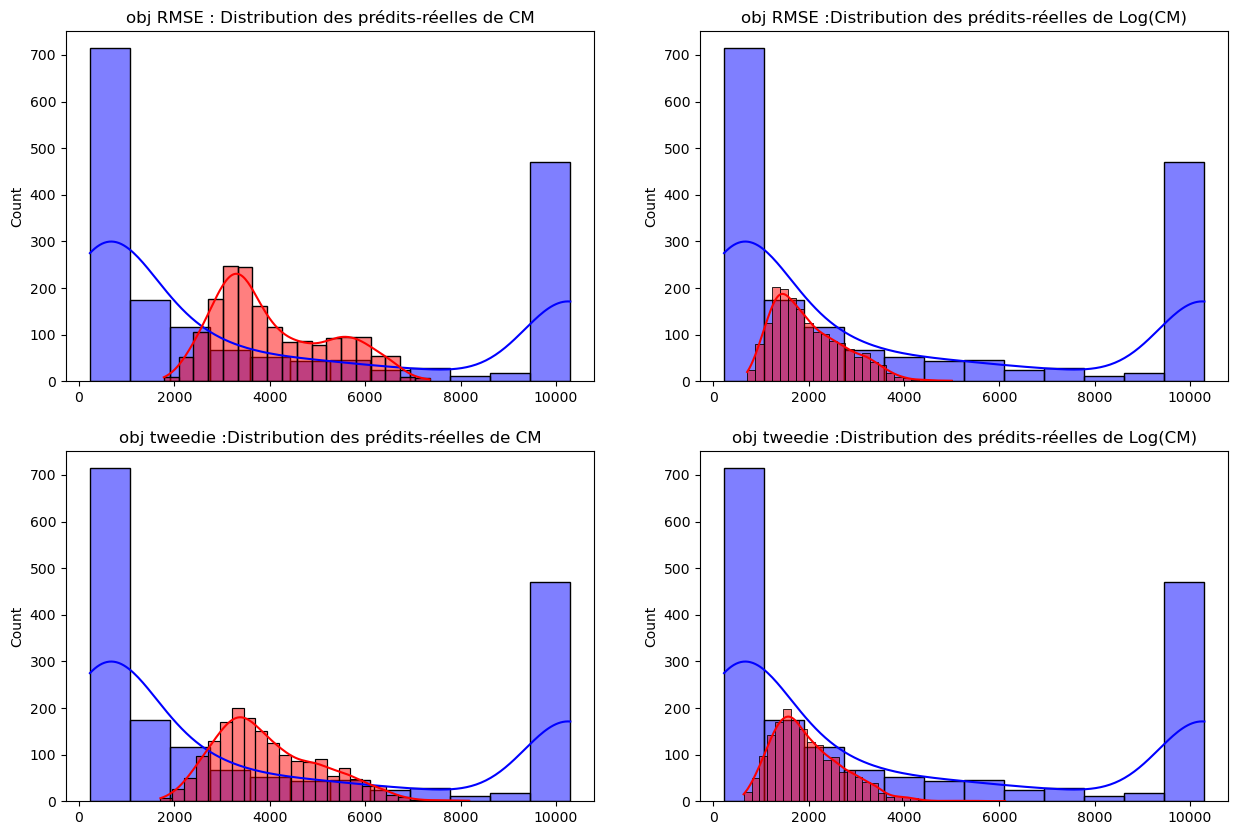

In [513]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title("obj RMSE : Distribution des prédits-réelles de CM")
ax = sns.histplot(y_train_cm_out_mad[y_train_cm_out_mad>0], color = 'blue',  kde = True, label = 'Réelles')
sns.histplot(bay_cm_NA.best_estimator_.predict(X_train_scs[y_train_cm_out_mad>0]), color = 'red', ax=ax, kde = True, label = 'Prédits_train')

plt.subplot(222)
plt.title("obj RMSE :Distribution des prédits-réelles de Log(CM)")
ax2 = sns.histplot(y_train_cm_out_mad[y_train_cm_out_mad>0], color = 'blue',  kde = True, label = 'Réelles')
sns.histplot(np.exp(bay_LOGcm_NA.best_estimator_.predict(X_train_scs[y_train_cm_out_mad>0])), color = 'red', ax=ax2, kde = True, label = 'Prédits_train')

plt.subplot(223)
plt.title("obj tweedie :Distribution des prédits-réelles de CM")
ax3 = sns.histplot(y_train_cm_out_mad[y_train_cm_out_mad>0], color = 'blue',  kde = True, label = 'Réelles')
sns.histplot(model_cm_tweedie.predict(X_train_scs[y_train_cm_out_mad>0]), color = 'red', ax=ax3, kde = True, label = 'Prédits_train')

plt.subplot(224)
plt.title("obj tweedie :Distribution des prédits-réelles de Log(CM)")
ax4 = sns.histplot(y_train_cm_out_mad[y_train_cm_out_mad>0], color = 'blue',  kde = True, label = 'Réelles')
sns.histplot(np.exp(LOG_model_cm_tweedie.predict(X_train_scs[y_train_cm_out_mad>0])), color = 'red', ax=ax4, kde = True, label = 'Prédits_train')

plt.show()

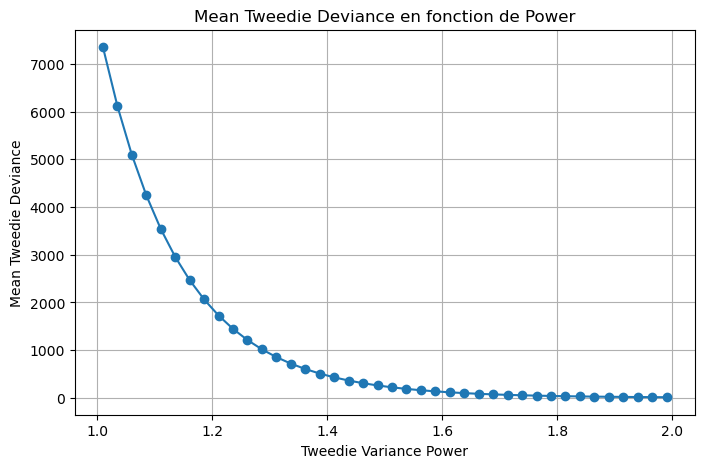

In [491]:
from sklearn.metrics import mean_tweedie_deviance

pred = model_cm_tweedie.predict(X_train_scs[y_train_cm_out_mad>0])

powers = np.linspace(1.01, 1.99, 40)
deviances = []

for p in powers:
    dev = mean_tweedie_deviance(y_train_sinistre[y_train_cm_out_mad>0], pred, power=p)
    deviances.append(dev)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(powers, deviances, marker='o')
plt.title("Mean Tweedie Deviance en fonction de Power")
plt.xlabel("Tweedie Variance Power")
plt.ylabel("Mean Tweedie Deviance")
plt.grid(True)
plt.show()


La déviance moyenne mesure la différence entre les prédits et les réelles.  
Une plus grande valeur de power (se rapproche d'une distribution gamma) obtient les meilleurs résulats

In [ ]:
# best model tweedie avec forte tweedie power(pour distri gamma)
model_cm_tweedie_power = LGBMRegressor(**best_tweed_para)
model_cm_tweedie_power.set_params(tweedie_variance_power = 1.8)
model_cm_tweedie_power.fit(X_train_scs[y_train_cm_out_mad>0],y_train_cm_out_mad[y_train_cm_out_mad>0])

''

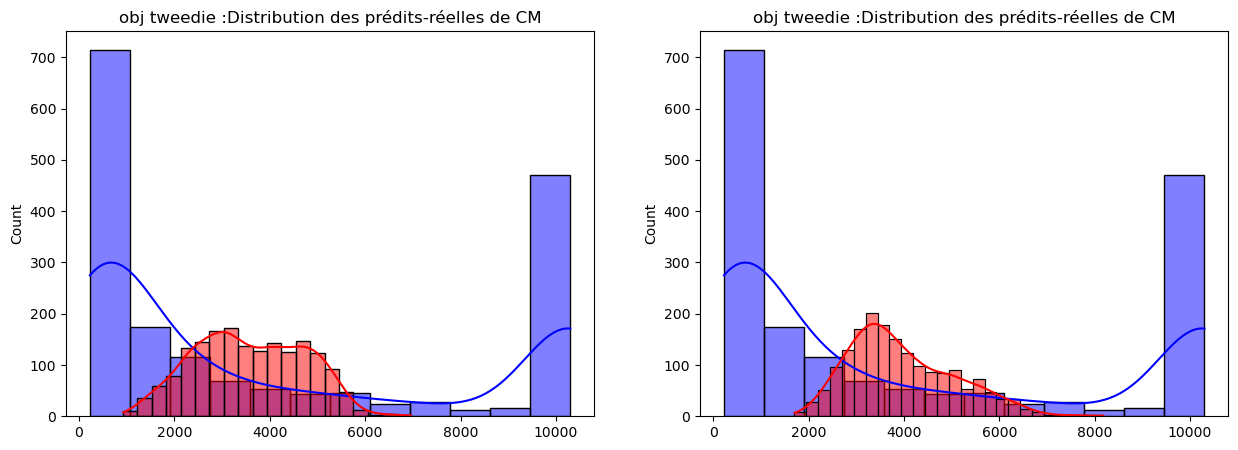

In [532]:
plt.figure(figsize=(15,5))

plt.subplot(121)

plt.title("obj tweedie :Distribution des prédits-réelles de CM")
ax3 = sns.histplot(y_train_cm_out_mad[y_train_cm_out_mad>0], color = 'blue',  kde = True, label = 'Réelles')
sns.histplot(model_cm_tweedie_power.predict(X_train_scs[y_train_cm_out_mad>0]), color = 'red', ax=ax3, kde = True, label = 'Prédits_train')

plt.subplot(122)
plt.title("obj tweedie :Distribution des prédits-réelles de CM")
ax4 = sns.histplot(y_train_cm_out_mad[y_train_cm_out_mad>0], color = 'blue',  kde = True, label = 'Réelles')
sns.histplot(model_cm_tweedie.predict(X_train_scs[y_train_cm_out_mad>0]), color = 'red', ax=ax4, kde = True, label = 'Prédits_train')
;

**tuning de model nb sinistre**

In [ ]:
from skopt.callbacks import DeadlineStopper #limite de temps
from skopt.callbacks import DeltaYStopper,EarlyStopper 
# early stoping round dans lgbm stop l'arbre dans lgbm
# DeltaXStopper et autre callabk de baye ne stop pas les arbres en cours mais le test des paramtres de baye

md_sinistre = LGBMRegressor()

parameters_Acp_sin = [{"objective" : Categorical(["tweedie"]),
                    "tweedie_variance_power" : Real(1,1.5,prior="log-uniform"),
                    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
                    "n_estimators" : Integer(150,800),
                    "max_depth": Integer(3,12),
                     'subsample' : Real(0.5,0.9),
                    'colsample_bytree' : Real(0.4,1),
                    "min_child_samples" :Integer(10,20)
                    },
                    {"objective" : Categorical(["poisson","root_mean_squared_error"]),
                    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
                    "n_estimators" : Integer(150,800),
                    "max_depth": Integer(3,15),
                    'subsample' : Real(0.5,0.9),
                    'colsample_bytree' : Real(0.5,1),
                    "min_child_samples" :Integer(10,20)}
                    ]
                
{"objective" : ["poisson","root_mean_squared_error"]}
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# tune pour sinistre
time_stop = DeadlineStopper(6*60)


bay_sin = BayesSearchCV(md_sinistre, 
                    search_spaces = parameters_Acp_sin,
                    n_iter=50,
                    cv = cv, scoring = "neg_root_mean_squared_error"
                    )

bay_sin.fit(X_train_scs,y_train_sinistre,callback=[time_stop])


In [538]:
print(bay_sin.best_params_)

OrderedDict({'colsample_bytree': 0.5025290697226138, 'learning_rate': 0.012563747704845987, 'max_depth': 6, 'min_child_samples': 14, 'n_estimators': 507, 'objective': 'tweedie', 'subsample': 0.892841286420101, 'tweedie_variance_power': 1.348018559228235})


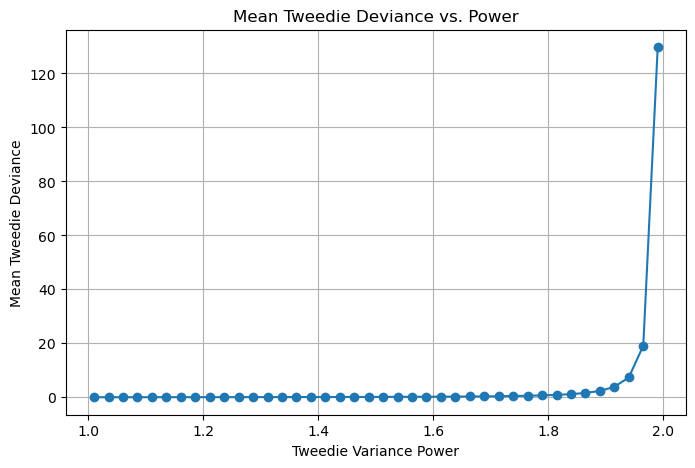

In [374]:
from sklearn.metrics import mean_tweedie_deviance

pred = bay_sin.best_estimator_.predict((X_train_scs))

powers = np.linspace(1.01, 1.99, 40)
deviances = []

for p in powers:
    dev = mean_tweedie_deviance(y_train_sinistre, pred, power=p)
    deviances.append(dev)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(powers, deviances, marker='o')
plt.title("Mean Tweedie Deviance vs. Power")
plt.xlabel("Tweedie Variance Power")
plt.ylabel("Mean Tweedie Deviance")
plt.grid(True)
plt.show()


In [547]:
#rawCM
rst_tuned = model_eval_pipe(X_train_scs,X_test_scs,
                                y_train,y_test
                                , y_train_cm_out_mad,y_test_cm_out_mad
                                , y_train_sinistre,y_test_sinistre,
                                bay_cm_NA.best_estimator_,bay_sin.best_estimator_
                                ,sinistre=True)

# log(CM)
rst_tuned_logCM = model_eval_pipe(X_train_scs,X_test_scs,
                                y_train,y_test,
                                 y_train_cm_out_mad,y_test_cm_out_mad
                                 , y_train_sinistre,y_test_sinistre,
                                bay_LOGcm_NA.best_estimator_,bay_sin.best_estimator_
                                ,sinistre=True,log=True)




In [548]:
rst_NA = pd.concat([rst_NA,
           pd.DataFrame(rst_tuned,index = ["tuned_NA"]),
            pd.DataFrame(rst_tuned_logCM,index = ["tuned_logCM_NA"])
            ])

rst_NA

#rédusction de l'overfitting sur cm mais les perf sur charges n'ont pas bougées

,rmse_train_CM,rmse_test_CM,diff_CM,rmse_train_FREQ,rmse_test_FREQ,diff_FREQ,rmse_train_CHARGE,rmse_test_CHARGE,diff_CHARGE,rmse_charge_pos_train,rmse_charge_pos_test,diff_charge_pos
bmk_NA,1468.274110,4199.679035,-2731.404925,0.081212,0.082296,-0.001084,406.674393,369.498885,37.175508,5175.735052,4697.271134,478.463919
SCS,1583.210805,4191.107556,-2607.896751,0.081265,0.082288,-0.001023,407.043236,369.425238,37.617998,5180.587466,4696.518331,484.069135
tuned_NA,3128.874697,4006.132636,-877.257939,0.081544,0.082216,-0.000673,409.622917,369.218783,40.404133,5211.334793,4691.554750,519.780043
tuned_logCM_NA,4130.946627,4448.906039,-317.959412,0.081544,0.082216,-0.000673,411.039566,369.346006,41.693560,5240.252777,4705.337237,534.915540


In [549]:
# rst avec les tweedie_power adaptés au distribution
# meilleur model avec tweedie
CM_search_rst = pd.DataFrame(bay_cm_NA.cv_results_) #meilleur modele CM
Log_CM_search_rst = pd.DataFrame(bay_cm_NA.cv_results_) # meilleur model log CM

best_tweed_para = CM_search_rst[CM_search_rst["param_objective"] == "tweedie"].sort_values(by = "rank_test_score")["params"].iloc[0]
best_tweed_para_LOG = Log_CM_search_rst[Log_CM_search_rst["param_objective"] == "tweedie"].sort_values(by = "rank_test_score")["params"].iloc[0]

# model CM avec changement valeur power tweedie
model_cm_tweedie_power = LGBMRegressor(**best_tweed_para)
model_cm_tweedie_power.set_params(tweedie_variance_power = 1.8)
model_cm_tweedie_power.fit(X_train_scs[y_train_cm_out_mad>0],y_train_cm_out_mad[y_train_cm_out_mad>0])

# model log(CM) avec changement valeur power tweedie
model_LOGcm_tweedie_power = LGBMRegressor(**best_tweed_para_LOG)
model_LOGcm_tweedie_power.set_params(tweedie_variance_power = 1.8)
model_LOGcm_tweedie_power.fit(X_train_scs[y_train_cm_out_mad>0],np.log(y_train_cm_out_mad[y_train_cm_out_mad>0]))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,001136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 1768, number of used features: 223
[LightGBM] [Info] Start training from score 8,312356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,001128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 1768, number of used features: 223
[LightGBM] [Info] Start training from score 2,018794


LGBMRegressor(colsample_bytree=0.5, learning_rate=0.003515488761134157,
              max_depth=13, n_estimators=653, num_leaves=23,
              objective='tweedie', tweedie_variance_power=1.8)

In [550]:
# ACP, rawCM
rst_tuned_tweedie = pd.DataFrame(model_eval_pipe(X_train_scs,X_test_scs,
                                y_train,y_test
                                , y_train_cm_out_mad,y_test_cm_out_mad
                                , y_train_sinistre,y_test_sinistre,
                                model_cm_tweedie_power,bay_sin.best_estimator_
                                ,sinistre=True), index=["tuned_tweedie"])

#ACP log(CM)
rst_tuned_logCM_tweedie = pd.DataFrame(model_eval_pipe(X_train_scs,X_test_scs,
                                y_train,y_test,
                                 y_train_cm_out_mad,y_test_cm_out_mad
                                 , y_train_sinistre,y_test_sinistre,
                                model_LOGcm_tweedie_power,bay_sin.best_estimator_
                                ,sinistre=True,log=True), index=["Log_tuned_tweedie"])




In [554]:
rst_NA = pd.concat([rst_NA,rst_tuned_tweedie,rst_tuned_logCM_tweedie])
rst_NA

,rmse_train_CM,rmse_test_CM,diff_CM,rmse_train_FREQ,rmse_test_FREQ,diff_FREQ,rmse_train_CHARGE,rmse_test_CHARGE,diff_CHARGE,rmse_charge_pos_train,rmse_charge_pos_test,diff_charge_pos
bmk_NA,1468.274110,4199.679035,-2731.404925,0.081212,0.082296,-0.001084,406.674393,369.498885,37.175508,5175.735052,4697.271134,478.463919
SCS,1583.210805,4191.107556,-2607.896751,0.081265,0.082288,-0.001023,407.043236,369.425238,37.617998,5180.587466,4696.518331,484.069135
tuned_NA,3128.874697,4006.132636,-877.257939,0.081544,0.082216,-0.000673,409.622917,369.218783,40.404133,5211.334793,4691.554750,519.780043
tuned_logCM_NA,4130.946627,4448.906039,-317.959412,0.081544,0.082216,-0.000673,411.039566,369.346006,41.693560,5240.252777,4705.337237,534.915540
tuned_tweedie,3368.199279,4033.266987,-665.067708,0.081544,0.082216,-0.000673,409.965242,369.214938,40.750304,5219.488136,4695.742616,523.745521
Log_tuned_tweedie,4234.726979,4462.741835,-228.014856,0.081544,0.082216,-0.000673,411.169059,369.365055,41.804004,5242.071238,4705.766356,536.304881


**modele sinistre avec gestion de fréquence**

Pour la fréquence test de class_weight ="balanced" dans model comme majorité de 0

In [ ]:
from skopt.callbacks import DeadlineStopper #limite de temps
# early stoping round dans lgbm stop l'arbre dans lgbm
# DeltaXStopper et autre callabk de baye ne stop pas les arbres en cours mais le test des paramtres de baye

md_sinistre = LGBMRegressor(class_weight="balanced")

parameters_Acp_sin = {"objective" : Categorical(["tweedie"]),
                    "tweedie_variance_power" : Real(1,1.4,prior="log-uniform"),
                    'learning_rate': Real(0.01, 0.1, 'log-uniform'),
                    "n_estimators" : Integer(150,800),
                    "max_depth": Integer(3,12),
                     'subsample' : Real(0.5,0.9),
                    'colsample_bytree' : Real(0.4,1),
                    "min_child_samples" :Integer(10,20)
                }
                

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# tune pour sinistre
time_stop = DeadlineStopper(6*60)


bay_sin_balanced = BayesSearchCV(md_sinistre, 
                    search_spaces = parameters_Acp_sin,
                    n_iter=50,
                    cv = cv, scoring = "neg_root_mean_squared_error"
                    )

bay_sin_balanced.fit(X_train_scs,y_train_sinistre,callback=[time_stop])


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,033830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1630
[LightGBM] [Info] Number of data points in the train set: 251743, number of used features: 238
[LightGBM] [Info] Start training from score -0,000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,035395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1629
[LightGBM] [Info] Number of data points in the train set: 251743, number of used features: 238
[LightGBM] [Info] Start training from score -0,000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,037735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

BayesSearchCV(cv=StratifiedKFold(n_splits=8, random_state=42, shuffle=True),
              estimator=LGBMRegressor(class_weight='balanced'),
              scoring='neg_root_mean_squared_error',
              search_spaces={'colsample_bytree': Real(low=0.4, high=1, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=0.1, prior='log-uniform', transform='normalize'),
                             'max_depth': In...
                             'min_child_samples': Integer(low=10, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=150, high=800, prior='uniform', transform='normalize'),
                             'objective': Categorical(categories=('tweedie',), prior=None),
                             'subsample': Real(low=0.5, high=0.9, prior='uniform', transform='normalize'),
                             'tweedie_variance_power': Real(low=1, high=1.4, prior='log-uniform', transform='normalize')})

In [ ]:
#  rawCM
frequence_balanced = pd.DataFrame(model_eval_pipe(X_train_scs,X_test_scs,
                                y_train,y_test
                                , y_train_cm_out_mad,y_test_cm_out_mad
                                , y_train_sinistre,y_test_sinistre,
                                bay_cm_NA.best_estimator_,bay_sin_balanced.best_estimator_
                                ,sinistre=True),index=["balanced"])

# log(CM)
LogCM_frequence_balanced = pd.DataFrame(model_eval_pipe(X_train_scs,X_test_scs,
                                y_train,y_test,
                                 y_train_cm_out_mad,y_test_cm_out_mad
                                 , y_train_sinistre,y_test_sinistre,
                                bay_LOGcm_NA.best_estimator_,bay_sin_balanced.best_estimator_
                                ,sinistre=True,log=True), index=["logCM_balanced"])




In [557]:
rst_NA = pd.concat([rst_NA,frequence_balanced,LogCM_frequence_balanced])


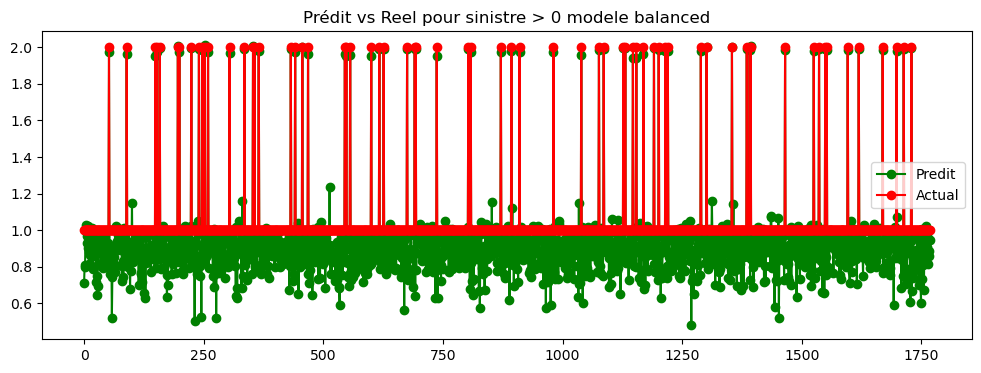

In [187]:
fig = plt.figure(figsize=(12,4))

plt.title('Prédit vs Reel pour sinistre > 0 modele balanced')
plt.plot(range(0,len(y_train_sinistre[y_train_sinistre>=1])), bay_sin_balanced.best_estimator_.predict(X_train_scs[y_train_sinistre>=1]), 'go-', label='Predit')
plt.plot(range(0,len(y_train_sinistre[y_train_sinistre>=1])), y_train_sinistre[y_train_sinistre>=1], 'ro-', label='Actual')
plt.legend();


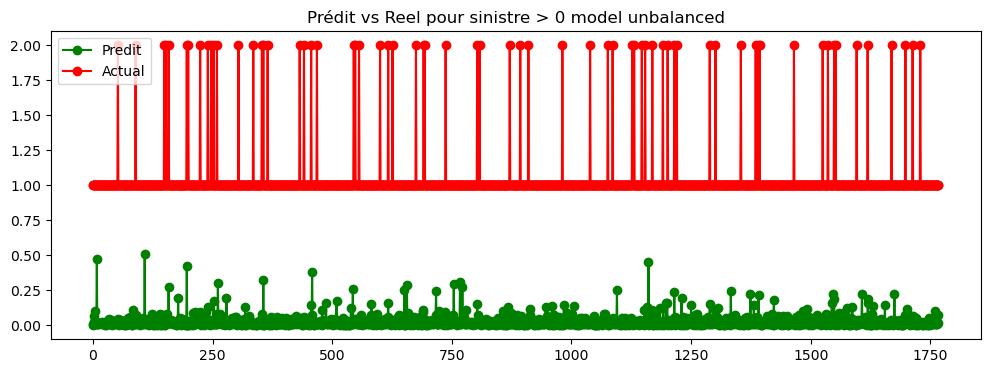

In [189]:
fig = plt.figure(figsize=(12,4))

plt.title('Prédit vs Reel pour sinistre > 0 model unbalanced')
plt.plot(range(0,len(y_train_sinistre[y_train_sinistre>=1])), bay_sin.best_estimator_.predict(X_train_scs[y_train_sinistre>=1]), 'go-', label='Predit')
plt.plot(range(0,len(y_train_sinistre[y_train_sinistre>=1])), y_train_sinistre[y_train_sinistre>=1], 'ro-', label='Actual')
plt.legend()
plt.show()

Avec modèle sur les fréquences lgbm balanced, les valeurs supérieurs à 0 sont mieux prédites (en tout cas dépassent 0.5)

In [558]:
rst_NA

,rmse_train_CM,rmse_test_CM,diff_CM,rmse_train_FREQ,rmse_test_FREQ,diff_FREQ,rmse_train_CHARGE,rmse_test_CHARGE,diff_CHARGE,rmse_charge_pos_train,rmse_charge_pos_test,diff_charge_pos
bmk_NA,1468.274110,4199.679035,-2731.404925,0.081212,0.082296,-0.001084,406.674393,369.498885,37.175508,5175.735052,4697.271134,478.463919
SCS,1583.210805,4191.107556,-2607.896751,0.081265,0.082288,-0.001023,407.043236,369.425238,37.617998,5180.587466,4696.518331,484.069135
tuned_NA,3128.874697,4006.132636,-877.257939,0.081544,0.082216,-0.000673,409.622917,369.218783,40.404133,5211.334793,4691.554750,519.780043
tuned_logCM_NA,4130.946627,4448.906039,-317.959412,0.081544,0.082216,-0.000673,411.039566,369.346006,41.693560,5240.252777,4705.337237,534.915540
tuned_tweedie,3368.199279,4033.266987,-665.067708,0.081544,0.082216,-0.000673,409.965242,369.214938,40.750304,5219.488136,4695.742616,523.745521
Log_tuned_tweedie,4234.726979,4462.741835,-228.014856,0.081544,0.082216,-0.000673,411.169059,369.365055,41.804004,5242.071238,4705.766356,536.304881
balanced,3128.874697,4006.132636,-877.257939,0.250665,0.258946,-0.008281,1020.179225,1047.710394,-27.531169,3240.036888,4223.124060,-983.087171
logCM_balanced,4130.946627,4448.906039,-317.959412,0.250665,0.258946,-0.008281,557.461320,582.940197,-25.478877,3910.570716,4428.386278,-517.815562


Résumé des perf des différentes strats : 
- drop de variables corrélées : pas de différences avec le modèle fit avec toutes les variables (retrait de 230 colonnes)
- tuning :  
    * CM : grosse diminution de l'overfitting 
    * mais pas d'impact sur les rst de la charge
- équilibrage de nb sinistre : 
    * sinistre : rmse augmente(parait cohérent car plus de valeur >0 sont prédites). 
    * charge : rmse augmente (rapport aux autres models de 200-600)
    * charge positive : rmse diminue (~300)  
    ==> équilibrage permet meilleur prédiction de quand il y a un incident
    

In [561]:
# selection du modele tuned "classique et log"

model_CM = bay_cm_NA.best_estimator_
model_CM_log = bay_LOGcm_NA.best_estimator_

model_freq = bay_sin.best_estimator_

In [562]:
from joblib import dump, load


# save des transformeurs
dump(preprocessor_NA, 'model_process/pipe_NA.joblib')

dump(scs_cm, 'model_process/SCS_cm.joblib')
dump(scs_pois, 'model_process/SCS_freq.joblib')

# model
dump(model_CM, 'model_process/model_CM_NA.joblib')

dump(model_CM_log, 'model_process/model_LogCM_NA.joblib')

dump(model_freq, 'model_process/model_FR_NA.joblib')


['model_process/model_FR_NA.joblib']

#### random Undersample et smote

In [566]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [567]:
np.unique(y_train_sinistre,return_counts=True)

(array([0, 1, 2]), array([285939,   1702,     66], dtype=int64))

In [572]:
# réduit par 5 le nb de 0 
# ajuster aussi y_CM
rus = RandomUnderSampler(random_state=12,sampling_strategy= {0 : 57187, 1: np.unique(y_train_sinistre,return_counts=True)[1][1]
                                                             , 2 : np.unique(y_train_sinistre,return_counts=True)[1][2]})


X_rus, sinistre_rus = rus.fit_resample(X_train_scs,y_train_sinistre)

In [573]:
print(X_train_scs.shape)
print(X_rus.shape)


(287707, 240)
(58955, 240)
(array([0, 1, 2]), array([57187,  1702,    66], dtype=int64))


**Oversampling**

In [574]:
# oversample classe 1 et 2
ros = RandomOverSampler(random_state=12,sampling_strategy={1 :22500 , 2 :22500 })
X_ros, sinistre_ros = ros.fit_resample(X_rus, sinistre_rus)

In [575]:
print(X_ros.shape)
print(np.unique(sinistre_ros,return_counts=True))

(102187, 240)
(array([0, 1, 2]), array([57187, 22500, 22500], dtype=int64))


In [ ]:
# raw CM
md_cm_ros = LGBMRegressor(**bay_cm_NA.best_params_)
md_sin_ros = LGBMRegressor(**bay_sin.best_params_)

md_cm_ros.fit(X_train_scs[y_train_cm_out_mad>0],y_train_cm_out_mad[y_train_cm_out_mad>0])
md_sin_ros.fit(X_ros,sinistre_ros)

rst_ROS = model_eval_pipe(X_train_scs,X_test_scs,
                                y_train,y_test,
                                 y_train_cm_out_mad,y_test_cm_out_mad,
                                 y_train_sinistre,y_test_sinistre,
                                md_cm_ros,md_sin_ros
                                ,sinistre=True)

# log(CM)
md_cm_ros_log = LGBMRegressor(**bay_LOGcm_NA.best_params_)
md_cm_ros_log.fit(X_train_scs[y_train_cm_out_mad>0],np.log(y_train_cm_out_mad[y_train_cm_out_mad>0]))

rst_log_ROS = model_eval_pipe(X_train_scs,X_test_scs,
                                y_train,y_test,
                                y_train_cm_out_mad,y_test_cm_out_mad,
                                y_train_sinistre,y_test_sinistre,
                                md_cm_ros_log,md_sin_ros
                                ,sinistre=True,log=True)



In [582]:
rst_NA = pd.concat([rst_NA,
           pd.DataFrame(rst_ROS, index=["PCA_ROS"]),
           pd.DataFrame(rst_log_ROS, index=["PCA_Log_ROS"])])

,rmse_train_CM,rmse_test_CM,diff_CM,rmse_train_FREQ,rmse_test_FREQ,diff_FREQ,rmse_train_CHARGE,rmse_test_CHARGE,diff_CHARGE,rmse_charge_pos_train,rmse_charge_pos_test,diff_charge_pos
bmk_NA,1468.274110,4199.679035,-2731.404925,0.081212,0.082296,-0.001084,406.674393,369.498885,37.175508,5175.735052,4697.271134,478.463919
SCS,1583.210805,4191.107556,-2607.896751,0.081265,0.082288,-0.001023,407.043236,369.425238,37.617998,5180.587466,4696.518331,484.069135
tuned_NA,3128.874697,4006.132636,-877.257939,0.081544,0.082216,-0.000673,409.622917,369.218783,40.404133,5211.334793,4691.554750,519.780043
tuned_logCM_NA,4130.946627,4448.906039,-317.959412,0.081544,0.082216,-0.000673,411.039566,369.346006,41.693560,5240.252777,4705.337237,534.915540
tuned_tweedie,3368.199279,4033.266987,-665.067708,0.081544,0.082216,-0.000673,409.965242,369.214938,40.750304,5219.488136,4695.742616,523.745521
Log_tuned_tweedie,4234.726979,4462.741835,-228.014856,0.081544,0.082216,-0.000673,411.169059,369.365055,41.804004,5242.071238,4705.766356,536.304881
balanced,3128.874697,4006.132636,-877.257939,0.250665,0.258946,-0.008281,1020.179225,1047.710394,-27.531169,3240.036888,4223.124060,-983.087171
logCM_balanced,4130.946627,4448.906039,-317.959412,0.250665,0.258946,-0.008281,557.461320,582.940197,-25.478877,3910.570716,4428.386278,-517.815562
PCA_ROS,3128.874697,4006.132636,-877.257939,0.336280,0.337529,-0.001249,1383.958936,1388.658754,-4.699818,3735.769340,3981.466997,-245.697658
PCA_Log_ROS,4130.946627,4448.906039,-317.959412,0.336280,0.337529,-0.001249,727.059744,724.128735,2.931008,4354.557606,4267.127923,87.429683


**SMOTE**

In [583]:
# smote avec random unndersample du nb de sinistre
# ncr de remplacer les NA par -99 ou autre. retransforme apres SMOTE pour LGBM
X_rus_na = X_rus.fillna(-99)

smt = SMOTE(random_state=12,k_neighbors = 10,sampling_strategy = {0 : 57187, 1:30000, 2 : 20000})
X_smt, sinistre_smt = smt.fit_resample(X_rus_na,sinistre_rus)

X_smt = X_smt.replace({-99 : np.nan})
# remet les NA



In [ ]:
# raw CM
md_cm_smote = LGBMRegressor(**bay_cm_NA.best_params_)
md_sin_smote = LGBMRegressor(**bay_sin.best_params_)

md_cm_smote.fit(X_train_scs[y_train_cm_out_mad>0],y_train_cm_out_mad[y_train_cm_out_mad>0])
md_sin_smote.fit(X_smt,sinistre_smt)

rst_SMT = model_eval_pipe(X_train_scs,X_test_scs,
                                y_train,y_test,
                                 y_train_cm_out_mad,y_test_cm_out_mad,
                                 y_train_sinistre,y_test_sinistre,
                                md_cm_smote,md_sin_smote
                                ,sinistre=True)

# log(CM)
md_cm_smt_log = LGBMRegressor(**bay_LOGcm_NA.best_params_)
md_cm_smt_log.fit(X_train_scs[y_train_cm_out_mad>0],np.log(y_train_cm_out_mad[y_train_cm_out_mad>0]))

rst_log_SMT = model_eval_pipe(X_train_scs,X_test_scs,
                                y_train,y_test,
                                y_train_cm_out_mad,y_test_cm_out_mad,
                                y_train_sinistre,y_test_sinistre,
                                md_cm_smt_log,md_sin_smote
                                ,sinistre=True,log=True)



In [587]:
rst_NA = pd.concat([rst_NA,
           pd.DataFrame(rst_SMT, index=["PCA_SMT"]),
           pd.DataFrame(rst_log_SMT, index=["PCA_Log_SMT"])])

In [588]:
rst_NA

,rmse_train_CM,rmse_test_CM,diff_CM,rmse_train_FREQ,rmse_test_FREQ,diff_FREQ,rmse_train_CHARGE,rmse_test_CHARGE,diff_CHARGE,rmse_charge_pos_train,rmse_charge_pos_test,diff_charge_pos
bmk_NA,1468.274110,4199.679035,-2731.404925,0.081212,0.082296,-0.001084,406.674393,369.498885,37.175508,5175.735052,4697.271134,478.463919
SCS,1583.210805,4191.107556,-2607.896751,0.081265,0.082288,-0.001023,407.043236,369.425238,37.617998,5180.587466,4696.518331,484.069135
tuned_NA,3128.874697,4006.132636,-877.257939,0.081544,0.082216,-0.000673,409.622917,369.218783,40.404133,5211.334793,4691.554750,519.780043
tuned_logCM_NA,4130.946627,4448.906039,-317.959412,0.081544,0.082216,-0.000673,411.039566,369.346006,41.693560,5240.252777,4705.337237,534.915540
tuned_tweedie,3368.199279,4033.266987,-665.067708,0.081544,0.082216,-0.000673,409.965242,369.214938,40.750304,5219.488136,4695.742616,523.745521
Log_tuned_tweedie,4234.726979,4462.741835,-228.014856,0.081544,0.082216,-0.000673,411.169059,369.365055,41.804004,5242.071238,4705.766356,536.304881
balanced,3128.874697,4006.132636,-877.257939,0.250665,0.258946,-0.008281,1020.179225,1047.710394,-27.531169,3240.036888,4223.124060,-983.087171
logCM_balanced,4130.946627,4448.906039,-317.959412,0.250665,0.258946,-0.008281,557.461320,582.940197,-25.478877,3910.570716,4428.386278,-517.815562
PCA_SMT,3128.874697,4006.132636,-877.257939,0.118197,0.119063,-0.000865,528.789110,506.401745,22.387365,4851.937327,4466.986895,384.950432
PCA_Log_SMT,4130.946627,4448.906039,-317.959412,0.118197,0.119063,-0.000865,432.645143,399.560005,33.085139,5052.540866,4589.561592,462.979275


In [ ]:
md_smt_tuned = LGBMRegressor(class_weight="balanced")

para_smt = {"objective" : Categorical(["tweedie"]),
                    "tweedie_variance_power" : Real(1,1.4,prior="log-uniform"),
                    'learning_rate': Real(0.01, 0.1, 'log-uniform'),
                    "n_estimators" : Integer(150,800),
                    "max_depth": Integer(3,12),
                     'subsample' : Real(0.5,0.9),
                    'colsample_bytree' : Real(0.4,1),
                    "min_child_samples" :Integer(10,20)
                }
                

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# tune pour sinistre
time_stop = DeadlineStopper(6*60)


bay_sin_smt = BayesSearchCV(md_smt_tuned, 
                    search_spaces = para_smt,
                    n_iter=50,
                    cv = cv, scoring = "neg_root_mean_squared_error"
                    )

bay_sin_smt.fit(X_smt,sinistre_smt,callback=[time_stop])

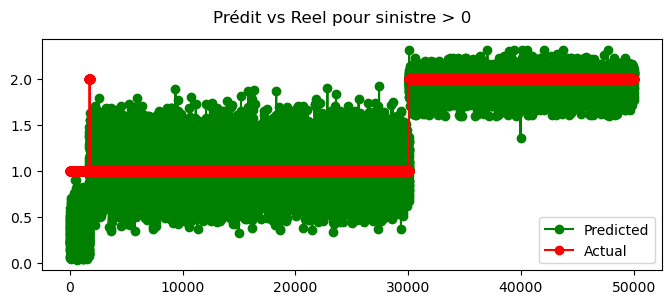

In [595]:
fig = plt.figure(figsize=(8,3))
fig.suptitle('Prédit vs Reel pour sinistre > 0')
plt.plot(range(0,len(sinistre_smt[sinistre_smt>=1])), bay_sin_smt.best_estimator_.predict(X_smt[sinistre_smt>=1]), 'go-', label='Predicted')
plt.plot(range(0,len(sinistre_smt[sinistre_smt>=1])), sinistre_smt[sinistre_smt>=1], 'ro-', label='Actual')
plt.legend()
plt.show()



In [596]:
SMT_tuned = pd.DataFrame(model_eval_pipe(X_train_scs,X_test_scs,
                                y_train,y_test,
                                 y_train_cm_out_mad,y_test_cm_out_mad,
                                 y_train_sinistre,y_test_sinistre,
                                md_cm_smote,bay_sin_smt.best_estimator_
                                ,sinistre=True),index =["SMT_tuned"])

Log_SMT_tuned = pd.DataFrame(model_eval_pipe(X_train_scs,X_test_scs,
                                y_train,y_test,
                                y_train_cm_out_mad,y_test_cm_out_mad,
                                y_train_sinistre,y_test_sinistre,
                                md_cm_smt_log,bay_sin_smt.best_estimator_
                                ,sinistre=True,log=True),index =["Log_SMT_tuned"])

In [598]:
rst_NA = pd.concat([rst_NA,SMT_tuned,Log_SMT_tuned])

In [603]:
rst_NA.sort_values(by="rmse_charge_pos_test")

,rmse_train_CM,rmse_test_CM,diff_CM,rmse_train_FREQ,rmse_test_FREQ,diff_FREQ,rmse_train_CHARGE,rmse_test_CHARGE,diff_CHARGE,rmse_charge_pos_train,rmse_charge_pos_test,diff_charge_pos
balanced,3128.874697,4006.132636,-877.257939,0.250665,0.258946,-0.008281,1020.179225,1047.710394,-27.531169,3240.036888,4223.124060,-983.087171
logCM_balanced,4130.946627,4448.906039,-317.959412,0.250665,0.258946,-0.008281,557.461320,582.940197,-25.478877,3910.570716,4428.386278,-517.815562
PCA_SMT,3128.874697,4006.132636,-877.257939,0.118197,0.119063,-0.000865,528.789110,506.401745,22.387365,4851.937327,4466.986895,384.950432
SMT_tuned,3128.874697,4006.132636,-877.257939,0.111220,0.121565,-0.010345,498.803699,517.315763,-18.512065,4153.059653,4471.541428,-318.481776
PCA_Log_SMT,4130.946627,4448.906039,-317.959412,0.118197,0.119063,-0.000865,432.645143,399.560005,33.085139,5052.540866,4589.561592,462.979275
Log_SMT_tuned,4130.946627,4448.906039,-317.959412,0.111220,0.121565,-0.010345,406.217697,402.772493,3.445204,4653.440250,4591.930725,61.509525
tuned_NA,3128.874697,4006.132636,-877.257939,0.081544,0.082216,-0.000673,409.622917,369.218783,40.404133,5211.334793,4691.554750,519.780043
tuned_tweedie,3368.199279,4033.266987,-665.067708,0.081544,0.082216,-0.000673,409.965242,369.214938,40.750304,5219.488136,4695.742616,523.745521
SCS,1583.210805,4191.107556,-2607.896751,0.081265,0.082288,-0.001023,407.043236,369.425238,37.617998,5180.587466,4696.518331,484.069135
bmk_NA,1468.274110,4199.679035,-2731.404925,0.081212,0.082296,-0.001084,406.674393,369.498885,37.175508,5175.735052,4697.271134,478.463919


Meilleur résulats sur charge : SCS + model tuned avec tweedie 1.8.  RMSE = 369   
Meilleur résultats sur charge positive : SCS + tuned avec nb sinistre balanced. RMSE = 4223  
mais overfit de 980. Modele le plus équilibré log(CM) +smote
